In [1]:
import numpy as np
import numpy.typing as npt
import matplotlib.pyplot as plt

# Definição dos algoritmos apresentados

In [2]:
# Algorithm 7.1. Classical Gram-Schmidt
def clgs(A: npt.NDArray):
    m, n = A.shape
    V = A.copy()
    Q = np.zeros((m, m))
    R = np.zeros((m, n))
    for j in range(n):
        for i in range(j):
            R[i, j] = np.dot(np.conjugate(Q[:, i]), A[:, j])
            V[:, j] = V[:, j] - R[i, j] * Q[:, i]
        R[j, j] = np.linalg.norm(V[:, j], ord=2)
        Q[:, j] = V[:, j]/R[j, j]
    return Q, R

In [3]:
# Algorithm 8.1. Modified Gram-Schmidt
def mgs(A: npt.NDArray):
    m, n = A.shape
    V = A.copy()
    Q = np.zeros((m, m))
    R = np.zeros((m, n))
    for i in range(n):
        R[i, i] = np.linalg.norm(V[:, i])
        Q[:, i] = V[:, i]/R[i, i]
        for j in range(i + 1, n):
            R[i, j] = np.dot(np.conjugate(Q[:, i]), V[:, j])
            V[:, j] = V[:, j] - R[i, j] * Q[:, i]
    return Q, R

# Experiment 2

In [8]:
A = np.random.randn(80, 80)
B = np.random.randn(80, 80)

In [9]:
U, X = np.linalg.qr(A)
V, X = np.linalg.qr(B)
S = np.diag(np.power(2.0, np.arange(-1.0, -81.0, -1.0)))
RES = U @ S @ V

In [10]:
QC, RC = clgs(RES)
QM, RM = mgs(RES)

In [11]:
diagRC = np.diag(RC)
diagRM = np.diag(RM)

Text(0.5, 1.0, 'Comparação dos $r_{jj}$ obtidos')

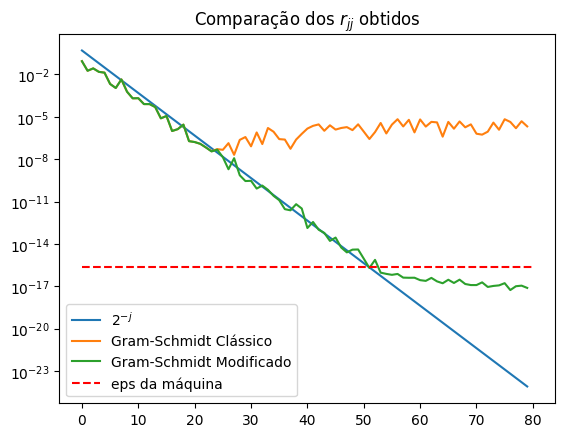

In [19]:
plt.plot(np.diag(S))
plt.plot(diagRC)
plt.plot(diagRM)
plt.yscale("log")
plt.hlines(np.finfo(np.float64).eps, 0, 80, linestyles="dashed", colors="red")
plt.legend(["$2^{-j}$", "Gram-Schmidt Clássico", "Gram-Schmidt Modificado", "eps da máquina"])
plt.title("Comparação dos $r_{jj}$ obtidos")

# Experiment 3

In [20]:
A = np.array([[0.70000, 0.70711], [0.70001, 0.70711]])
A

array([[0.7    , 0.70711],
       [0.70001, 0.70711]])

In [21]:
Q, R = np.linalg.qr(A)
display(np.linalg.norm(Q.T @ Q - np.eye(2)))
Q, R = mgs(A)
display(np.linalg.norm(Q.T @ Q - np.eye(2)))

np.float64(2.3411870786352597e-16)

np.float64(3.254726094493924e-11)

Suficientemente próximo do resultado obtido no livro, dentro de uma tolerância.